In [1]:
import numpy as np
import pandas as pd

In [28]:
data = pd.read_csv("Iris.csv")

In [38]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
68,6.2,2.2,4.5,1.5
21,5.1,3.7,1.5,0.4
130,7.4,2.8,6.1,1.9
83,6.0,2.7,5.1,1.6
135,7.7,3.0,6.1,2.3
100,6.3,3.3,6.0,2.5
145,6.7,3.0,5.2,2.3
90,5.5,2.6,4.4,1.2
134,6.1,2.6,5.6,1.4
57,4.9,2.4,3.3,1.0


In [35]:
data.drop(["Id", "Species"], axis=1, inplace=True)

KeyError: "labels ['Id' 'Species'] not contained in axis"

In [32]:
data.drop_duplicates(inplace=True)

In [48]:
class KNN:
    """使用Python实现k近邻算法（回归预测）
    该算法用于回归预测，根据前3个特征属性，寻找最近的k个邻居，然后根据最近的k个邻居第四个特征属性，预测当前样本的第四个特征值
    """
    
    def __init__(self, k):
        """初始化方法
        
        Parameters
        ----
        k:int
            邻居个数
        """
        self.k = k
        
    def fit(self, X, y):
        """训练方法。
        
        Parameters
        ----
        X:待训练的样本特征。
        y:每个样本的目标值。
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """根据参数传递的X，对样本数据进行预测。
        
        Parameters:
        ----
        X:待测试的样本特征。
        result:预测的结果值。
        """
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            index = dis.argsort()
            index = index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)
    
    def predict2(self, X):
        """根据参数传递的X，对样本数据进行预测。
        权重的计算方式：使用每个节点距离的倒数/所有节点距离倒数之和。
        
        Parameters:
        ----
        X:待测试的样本特征。
        result:预测的结果值。
        """
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            index = dis.argsort()
            index = index[:self.k]
            s = np.sum(1/(dis[index] + 0.001))
            weight = (1 / (dis[index] + 0.001)) / s
            result.append(np.sum(self.y[index] * weight))
        return np.array(result)
        

In [54]:
tn = 120 #int(len(data)*0.8) #训练样本数
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:tn, :-1]
train_y = t.iloc[:tn, -1]
test_X = t.iloc[tn:, :-1]
test_y = t.iloc[tn:, -1]

knn = KNN(k=4)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
display(result)
display(np.mean((result - test_y)**2))
display(test_y.values)

#train_X.head()

array([1.325, 1.975, 1.25 , 1.25 , 2.   , 1.2  , 2.2  , 0.325, 1.95 ,
       1.375, 1.15 , 0.2  , 1.9  , 2.325, 1.65 , 0.175, 1.05 , 1.3  ,
       1.75 , 1.225, 0.175, 0.225, 0.2  , 2.1  , 1.15 , 1.825, 0.225])

0.04118055555555555

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

## 考虑权重

In [55]:
result = knn.predict2(test_X)
display(np.mean((result - test_y)**2))

0.04416233568342937

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

/Users/hornsey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


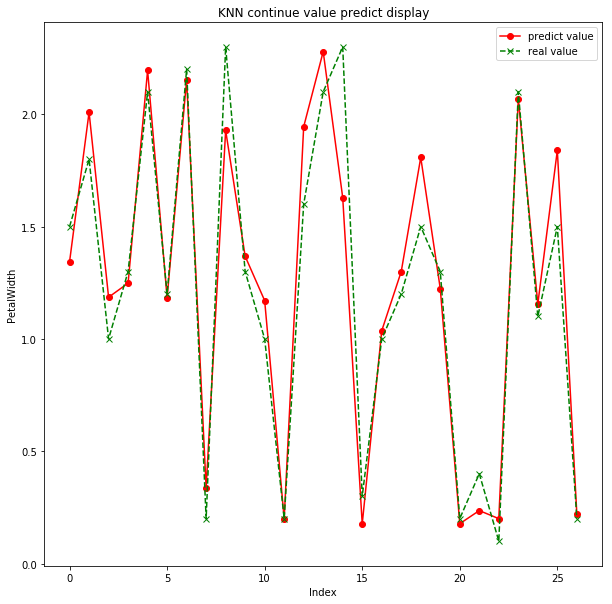

In [56]:
plt.figure(figsize=(10,10))
plt.plot(result, "ro-", label="predict value")
plt.plot(test_y.values, "gx--", label="real value")
plt.title("KNN continue value predict display")
plt.xlabel("Index")
plt.ylabel("PetalWidth")
plt.legend()
plt.show()
